# Assignment 4 (20 pts) - Due: 9/23/22 (10pm):
## Group Members:

### In this assignment, you will be using pandas to load in a dataset of flight delays for January 2019 and perform an EDA (Exploratory Data Analysis) of the data. The data (.csv file) and the metadata column descriptions(.txt) file are located on BlackBoard with this assignment. Use a Jupyter notebook to create a report that answers the following questions and creates a few plots about this data.  Your report should not only answer these questions but also the code you implemented to perform your analysis.  Note that these questions are not separate problems but rather items you can address in any order you choose.

#### * What is the median number of flights from all airports?
#### * Which are the 5 busiest airports?  Which are the last busiest airports
#### * What percentages of flights from all airports are on-time? 
#### * Which airlines are better than the average? Which airlines are worse than the average?
#### * What airports are better than the average?  Which airports are worse than the average? 
#### * Which feature (column) in the data set is most correlated with departure delays?
#### * Make a histogram plot visualizing the number of flights for the 5 best on-time airports.
#### * Make a scatter plot of the departure delays and the feature most correlated with the delays

## Extra Credit (5 points)
### Perform another exploratory analysis with the data and add this to the report.  Be sure to emphasis in your report that this is something you chose to do on your own.  Be creative and document your findings.   Try to come up with something unique that someone else wouldn't think of.

#### Which feature (column) in the data set is most correlated with departure delays?
---
From the given data, the feature that is most correlated with departure delays is the AWND (Max wind speed for day) with  a correlation coefficient of 0.096 (rounded to three decimal places). To find this value, we compared each column of the inital dataFrame by using the dataFrame.corr() function. This function calculates the Pearson correlation coefficient using two Series as input. The lowest correlation between departure delays is the TMAX (Max temperature per day) with a correlation coefficient of -0.084. 
## Data Table
---

| Column Compared w/ Departure Delays | Correlation Coefficient |
| ----------------------------------- | ----------------------- |
| AWND                                | 0.09594817178107087     |
| SEGMENT_NUMBER                      | 0.09510771637205825     |
| SNWD                                | 0.0801626367853268      |
| PRCP                                | 0.07758617191074428     |
| SNOW                                | 0.07493530815553275     | 
| LONGITUDE                           | 0.04881026497005194     |
| LATITUDE                            | 0.033903174387068115    |
| AIRPORT_FLIGHTS_MONTH               | 0.020906933451150574    |
| AVG_MONTHLY_PASS_AIRPORT            | 0.016891013845044916    |
| CONCURRENT_FLIGHTS                  | 0.01639411038302884     |
| DISTANCE_GROUP                      | 0.008353163487112679    |
| FLT_ATTENDANTS_PER_PASS             | 0.003346946165796172    |
| PLANE_AGE                           | 0.002428205202463416    |
| DAY_OF_WEEK                         | -0.005439844685933999   |
| AIRLINE_AIRPORT_FLIGHTS_MONTH       | -0.015177135471537786   |
| AIRLINE_FLIGHTS_MONTH               | -0.025811926997068815   |
| NUMBER_OF_SEATS                     | -0.029931563828447024   |
| GROUND_SERV_PER_PASS                | -0.030129665535164808   |
| AVG_MONTHLY_PASS_AIRLINE            | -0.041768473166607444   |
| TMAX                                | -0.08436366482847822    |



AWND
0.09594817178107087

SEGMENT_NUMBER
0.09510771637205825

SNWD
0.0801626367853268

PRCP
0.07758617191074428

SNOW
0.07493530815553275

LONGITUDE
0.04881026497005194

LATITUDE
0.033903174387068115

AIRPORT_FLIGHTS_MONTH
0.020906933451150574

AVG_MONTHLY_PASS_AIRPORT
0.016891013845044916

CONCURRENT_FLIGHTS
0.01639411038302884

DISTANCE_GROUP
0.008353163487112679

FLT_ATTENDANTS_PER_PASS
0.003346946165796172

PLANE_AGE
0.002428205202463416

DAY_OF_WEEK
-0.005439844685933999

AIRLINE_AIRPORT_FLIGHTS_MONTH
-0.015177135471537786

AIRLINE_FLIGHTS_MONTH
-0.025811926997068815

NUMBER_OF_SEATS
-0.029931563828447024

GROUND_SERV_PER_PASS
-0.030129665535164808

AVG_MONTHLY_PASS_AIRLINE
-0.041768473166607444

TMAX
-0.08436366482847822



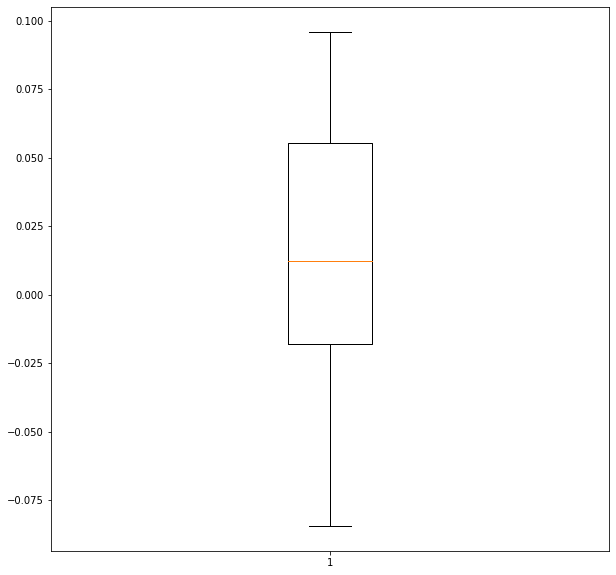

'\n#Scipy.Stats.spearmanr\ndelays = df_cut["DEP_DEL15"].tolist()\nfor(columnName, columnData) in df_cut.iteritems():\n    comparisons.append(columnName)\n    correlation.append(spearmanr(delays, columnData))\n'

In [80]:
from http.client import PRECONDITION_FAILED
from sqlite3 import DatabaseError
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Which feature (column) in the data set is most correlated with departure delays?

#sortDict - sorts a dictionay in descending order
#Reference: https://stackabuse.com/how-to-sort-dictionary-by-value-in-python/
def sortDict(dictionary):
    sorted_values = sorted(dictionary.values(), reverse=True) 
    sorted_dict = {}

    for i in sorted_values:
        for k in dictionary.keys():
            if dictionary[k] == i:
                #adding dictionary key-value pairs to sorted_values
                sorted_dict[k] = dictionary[k]
                break

    return sorted_dict

df = pd.read_csv('train_test_3.csv', index_col=0)

#Removing columns that have string values
df_cut = df.drop(['DEP_BLOCK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT'], axis=1)

comparisons = []
correlation = []

corrDict = {}

#Calculating the correlation coefficient with DataFrame.corr()
for (columnName, columnData) in df_cut.iteritems():
    if(columnName != "DEP_DEL15"):
        #Adding the key-values to the dictionary
        corrDict[columnName] = df_cut["DEP_DEL15"].corr(df[columnName])

        #Adding the columnNames and their correlation coefficients to arrays for the scatter plot
        comparisons.append(columnName)
        correlation.append(df_cut["DEP_DEL15"].corr(df[columnName]))

sortedCorrDict = sortDict(corrDict)

#Printing data from the correlation dictionary
for entry in sortedCorrDict.keys():
    print(entry)
    print(sortedCorrDict.get(entry))
    print()

#Creating a scatterplot from the correlation information
fig = plt.figure(figsize= (10,10))
    
plt.boxplot(correlation)

plt.show()

comparisons.clear()
correlation.clear()

#Calculating the correlation coeffiecients via pearsonr()
"""
#Scipy.Stats.pearsonr
delays = df_cut["DEP_DEL15"].tolist()
for (columnName, columnData) in df_cut.iteritems():
    comparisons.append(columnName)
    correlation.append(pearsonr(delays, columnData))
"""

comparisons.clear()
correlation.clear()

#Calculating the correlation coeffiecients via spearmanr()
"""
#Scipy.Stats.spearmanr
delays = df_cut["DEP_DEL15"].tolist()
for(columnName, columnData) in df_cut.iteritems():
    comparisons.append(columnName)
    correlation.append(spearmanr(delays, columnData))
"""


## Theory
---
**Airlines that on average use older airplanes for their flights will have less flights per month.**

## Data Collection Methods / Considerations
---
- There are a number of airlines that fly a much higher/lower amount of flights than the average amount per month. This being said, 8 airlines have been selected for this test because
they're flights per month are near the middle of the spectrum. This will help to prevent the data being skewed one way or another. 

## Report Body
---
The theory that is being tested is whether airlines that on average use older airplanes for their flights are limited to less flights per month than their competitors. This would be due to the airplanes needing more maintenance/repairs because of their old age, or due to their inefficiency.  

![BAR GRAPH OF AIRLINE FLIGHTS BY CARRIER PER MONTH](graph1.png )

## Data Table
---
| CARRIER NAME                 | AIRLINE FLIGHTS PER MONTH | AVERAGE PLANE AGE |
| ---------------------------- | ------------------------- | ----------------- |
| American Eagle Airlines Inc. | 23760                     | 11.995761         |
| Comair Inc.                  | 22418                     | 9.727726          |
| Alaska Airlines Inc.         | 20315                     | 8.345032          |
| Endeavor Air Inc.            | 19857                     | 10.535102         |
| Mesa Airlines Inc.           | 17869                     | 9.589505          |
| Spirit Air Lines             | 15023                     | 5.758050          |
| Atlantic Southeast Airlines  | 12231                     | 12.377113         |
| Frontier Airlines Inc.       | 9496                      | 4.749405          |

## Comments / Limitations of Report
---
- It isn't known how many planes each airline owns, only the amount of flights that they make and the age of the plane for each flight
- The 8 airlines that were most central in the overall number of flights per month have been chosen, but they still are very different in terms of how many planes they fly per month. 

## Conclusion
---

## Data Processing Steps
---
1. The CSV file is read into the program
2. Entries are grouped by their carrier name 
3. A new dataFrame is initailized to hold data
4. The dataFrame is filled with rows taht are : ["Carrier Name", "Number of Flights for Carrier per Month", "Average age of planes for carrier"]
5. Rows are sorted in descending order by their flights per month
6. Rows are removed from the dataFrame so that only 8 Airlines are remaining. This is help remove any outliers from the data
7. The correlation coefficient is calculated
8. A bar graph of Airline Flights by Carrier per month is created
9. A pie chart of airline flights by carrier per month is generated 
10. A scatter plot comparing average airplane age by number of flights for each carrier is made

                    CARRIER_NAME  AIRLINE_FLIGHTS_MONTH  PLANE_AGE_AVG
4   American Eagle Airlines Inc.                  23760      11.995761
10                   Comair Inc.                  22418       9.727726
9           Alaska Airlines Inc.                  20315       8.345032
13             Endeavor Air Inc.                  19857      10.535102
12            Mesa Airlines Inc.                  17869       9.589505
0               Spirit Air Lines                  15023       5.758050
14   Atlantic Southeast Airlines                  12231      12.377113
7         Frontier Airlines Inc.                   9496       4.749405

Correlation Coefficient
0.5058510202667232


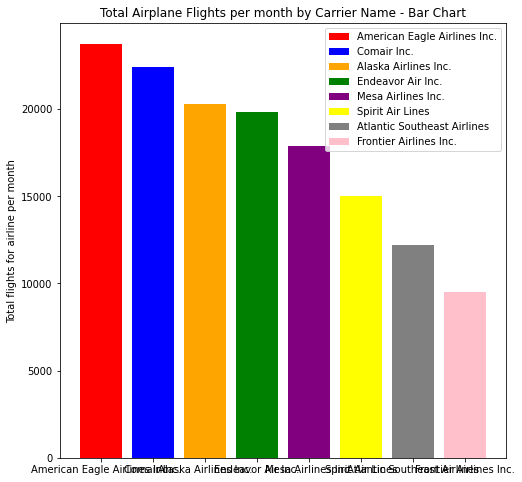

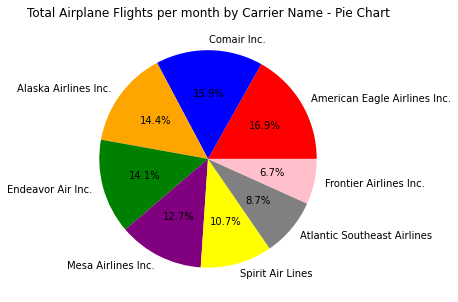

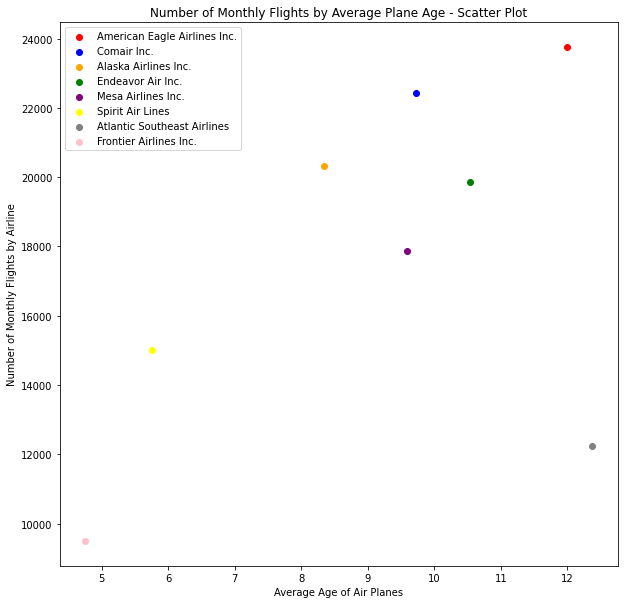

In [78]:
#Finding the correlation between the [Number of Ground Service Attendants] & [Plane Age]

from importlib.machinery import FrozenImporter
from operator import index
from turtle import color, width

df = pd.read_csv('train_test_3.csv', index_col=0)

carriers = df["CARRIER_NAME"].drop_duplicates()
groupedByCarrier = df.groupby(df["CARRIER_NAME"])

#Creating new DataFrame for to hold results
df_inital = pd.DataFrame(columns= ["CARRIER_NAME", "AIRLINE_FLIGHTS_MONTH", "PLANE_AGE_AVG"])
iterations = 0


for carrier in carriers:
        df_temp = groupedByCarrier.get_group(carrier)

        #Adding rows of data to the inital dataFrame ["Carrier Name", "Number of Flights for Carrier per Month", "Average age of planes for carrier"]
        df_inital.loc[iterations] = [carrier, df_temp.iloc[0]["AIRLINE_FLIGHTS_MONTH"], df_temp["PLANE_AGE"].mean()]
        iterations += 1

#Sorted dataFrame by Airline flights per month
df_sorted = df_inital.sort_values(by=["AIRLINE_FLIGHTS_MONTH"], ascending=False)

#Removing rows from the data frame that aren't going to be used for calculations because they could skew data
df_final = df_sorted.drop(index=[8,2,3,6,1,16,15,5,11])

print(df_final)
print()

#================================== Correlation Coefficient ========================================
corrCoe = df_final["PLANE_AGE_AVG"].corr(df_final["AIRLINE_FLIGHTS_MONTH"])
print("Correlation Coefficient")
print(corrCoe)

#================================== BAR GRAPH OF AIRLINE FLIGHTS BY CARRIER PER MONTH ===============================================
fig = plt.figure(figsize= (8,8))

plt.bar(df_final.iloc[0]["CARRIER_NAME"], df_final.iloc[0]["AIRLINE_FLIGHTS_MONTH"], color = 'red', label= "American Eagle Airlines Inc.")
plt.bar(df_final.iloc[1]["CARRIER_NAME"], df_final.iloc[1]["AIRLINE_FLIGHTS_MONTH"], color = 'blue', label = "Comair Inc.")
plt.bar(df_final.iloc[2]["CARRIER_NAME"], df_final.iloc[2]["AIRLINE_FLIGHTS_MONTH"], color = 'orange', label = "Alaska Airlines Inc.")
plt.bar(df_final.iloc[3]["CARRIER_NAME"], df_final.iloc[3]["AIRLINE_FLIGHTS_MONTH"], color = 'green', label = "Endeavor Air Inc.")
plt.bar(df_final.iloc[4]["CARRIER_NAME"], df_final.iloc[4]["AIRLINE_FLIGHTS_MONTH"], color = 'purple', label = "Mesa Airlines Inc.")
plt.bar(df_final.iloc[5]["CARRIER_NAME"], df_final.iloc[5]["AIRLINE_FLIGHTS_MONTH"], color = 'yellow', label = "Spirit Air Lines")
plt.bar(df_final.iloc[6]["CARRIER_NAME"], df_final.iloc[6]["AIRLINE_FLIGHTS_MONTH"], color = 'grey', label = "Atlantic Southeast Airlines")
plt.bar(df_final.iloc[7]["CARRIER_NAME"], df_final.iloc[7]["AIRLINE_FLIGHTS_MONTH"], color = 'pink', label = "Frontier Airlines Inc.")

plt.xlabel(None)
plt.ylabel("Total flights for airline per month")

plt.title("Total Airplane Flights per month by Carrier Name - Bar Chart")
plt.legend()

plt.show()

#================================== PIE CHART OF AIRLINE FLIGHTS BY CARRIER PER MONTH ===============================================
chartLabels = df_final["CARRIER_NAME"]
chartVals = df_final["AIRLINE_FLIGHTS_MONTH"]

fig = plt.figure(figsize= (5,5))

plt.pie(chartVals, labels=chartLabels, colors=['red','blue','orange','green','purple','yellow','grey','pink'], autopct='%1.1f%%')
plt.title("Total Airplane Flights per month by Carrier Name - Pie Chart")
plt.show()

#============================ SCATTERPLOT COMPARING AVERAGE AIRPLANE AGE BY NUMBER OF FLIGHTS FOR EACH CARRIER ======================
fig = plt.figure(figsize= (10,10))

plt.scatter(df_final.iloc[0]["PLANE_AGE_AVG"], df_final.iloc[0]["AIRLINE_FLIGHTS_MONTH"], color = 'red', label= "American Eagle Airlines Inc.")
plt.scatter(df_final.iloc[1]["PLANE_AGE_AVG"], df_final.iloc[1]["AIRLINE_FLIGHTS_MONTH"], color = 'blue', label = "Comair Inc.")
plt.scatter(df_final.iloc[2]["PLANE_AGE_AVG"], df_final.iloc[2]["AIRLINE_FLIGHTS_MONTH"], color = 'orange', label = "Alaska Airlines Inc.")
plt.scatter(df_final.iloc[3]["PLANE_AGE_AVG"], df_final.iloc[3]["AIRLINE_FLIGHTS_MONTH"], color = 'green', label = "Endeavor Air Inc.")
plt.scatter(df_final.iloc[4]["PLANE_AGE_AVG"], df_final.iloc[4]["AIRLINE_FLIGHTS_MONTH"], color = 'purple', label = "Mesa Airlines Inc.")
plt.scatter(df_final.iloc[5]["PLANE_AGE_AVG"], df_final.iloc[5]["AIRLINE_FLIGHTS_MONTH"], color = 'yellow', label = "Spirit Air Lines")
plt.scatter(df_final.iloc[6]["PLANE_AGE_AVG"], df_final.iloc[6]["AIRLINE_FLIGHTS_MONTH"], color = 'grey', label = "Atlantic Southeast Airlines")
plt.scatter(df_final.iloc[7]["PLANE_AGE_AVG"], df_final.iloc[7]["AIRLINE_FLIGHTS_MONTH"], color = 'pink', label = "Frontier Airlines Inc.")

plt.xlabel("Average Age of Air Planes")
plt.ylabel("Number of Monthly Flights by Airline")
plt.title("Number of Monthly Flights by Average Plane Age - Scatter Plot")
plt.legend()

plt.show()
